## **Implementing Linear Regression with Gradient Descent as Optimization Function**

Link to the github repository: https://github.com/sharahmichelle/CMSC-197.git

In [24]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# 1.) Load Advertising.csv dataset using pandas

In [25]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising (1).csv


In [27]:
data = pd.read_csv("Advertising.csv", index_col = 0)
print("Size of the data:", data.shape)
data.head()

Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# 2.) Standardize each column of the dataset

In [28]:
data_standardized = pd.DataFrame(scale(data), columns=data.columns)
data_standardized

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


# 3.) add an extra column composing of all ones to X

In [29]:
data_standardized.insert(0, "bias", 1)
data_standardized

,bias,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-1.234053
196,1,-0.617035,-1.240003,-1.033598,-0.830548
197,1,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.594565,1.265121,1.640850,2.205347


In [30]:
# predictor values
x = data_standardized.drop("Sales", axis=1)
x

,bias,TV,Radio,Newspaper
0,1,0.969852,0.981522,1.778945
1,1,-1.197376,1.082808,0.669579
2,1,-1.516155,1.528463,1.783549
3,1,0.052050,1.217855,1.286405
4,1,0.394182,-0.841614,1.281802
...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217
196,1,-0.617035,-1.240003,-1.033598
197,1,0.349810,-0.942899,-1.111852
198,1,1.594565,1.265121,1.640850


In [31]:
# response variable
y = data_standardized["Sales"]
y

,Sales
0,1.552053
1,-0.696046
2,-0.907406
3,0.860330
4,-0.215683
...,...
195,-1.234053
196,-0.830548
197,-0.234898
198,2.205347


# 4.) Divide the dataset into training and testing, with 0.85 and 0.15 ratio, respectively.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.85, test_size=0.15)

print("Size of x_train: ", x_train.shape)
print("Size of x_test: ", x_test.shape)

print("Size of y_train: ", y_train.shape)
print("Size of y_test: ", y_test.shape)

Size of x_train:  (170, 4)
Size of x_test:  (30, 4)
Size of y_train:  (170,)
Size of y_test:  (30,)


# 5.) Fit the model on the training set

In [33]:
# 1. initialize_weights: returns a vector init_w composing of 4 uniformly distributed numbers between 0 and 1.
def initialize_weights():
    # store the same random numbers
    np.random.seed(10)
    #  uniformly distributed numbers between 0 and 1
    init_w = np.random.uniform(0,1,4)
    return init_w

weight = initialize_weights()

In [34]:
# 2. predict: returns a vector of the predicted values
def predict(x, weight):
    y_hat = np.dot(x, weight)
    return y_hat

In [35]:
# 3. compute_cost: returns a scalar value that tells us how accurate the model is
def compute_cost(y, y_hat, weight):
    # n sample
    m = len(y)
    # cost function
    cost = 1/(m*2) * np.sum(np.square(y_hat - y))
    return cost

In [36]:
# 4. compute_gradient: returns a matrix w that represents the partial derivative of the cost function
def compute_gradient(x, y, weight):
    m = len(y)
    # predicting the y
    y_hat = predict(x, weight)
    w = 1/m * np.dot((y_hat - y), x)
    return w

In [37]:
# 5. update_weights: returns a 4x1 matrix that contains the updated weights
def update_weights(weight, w, learning_rate):
    updated_weights = weight - (w * learning_rate)
    return updated_weights

In [38]:
# 6. grad_descent: returns 2 matrices: one matrix for the weights, and one matrix for the cost values per iteration
def grad_descent(x, y, weight, learning_rate, iterations):
    # array to store costs and weights
    costs = []
    weights = []
    for i in range(iterations):
        y_hat = predict(x, weight)
        # compute the cost and store it
        cost = compute_cost(y_hat, y, weight)
        costs.append(cost)
        # compute the gradient
        gradient = compute_gradient(x, y, weight)
        # update the weights based on the gradient
        weight = update_weights(weight, gradient, learning_rate)
        # store the updated weights
        weights.append(weight.copy())  # copy to store the current weights
    # convert weights and costs to numpy arrays (matrices)
    weights_matrix = np.array(weights)  # each row contains weights at each iteration
    costs_matrix = np.array(costs).reshape(-1, 1)

    return weights_matrix, costs_matrix

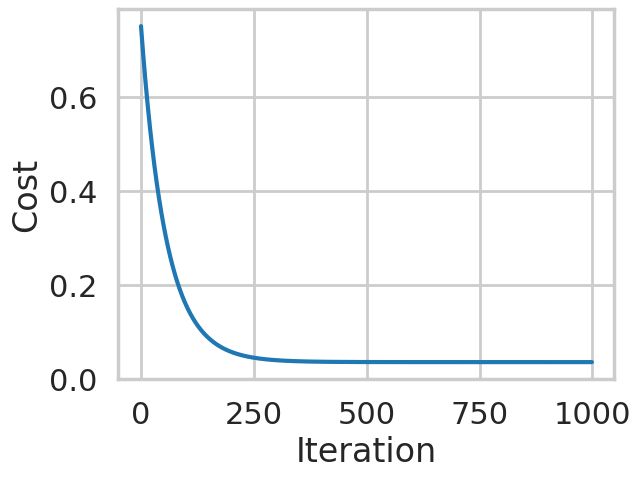

In [73]:
# 7. plot_costs: plot the costs as a function of iteration
def plot_costs(costs_matrix):
    plt.plot(costs_matrix)
    plt.ylabel("Cost")
    plt.xlabel("Iteration")
    plt.show()

weights_matrix, costs_matrix = grad_descent(x_train, y_train, weight, 0.01, 1000)
plot_costs(costs_matrix)

In [74]:
# 8. Predict y for train set and calculate the cost.

# predicting the y for train set
y_hat_train = predict(x_train, weight)
# create columns for predicted and actual values
y_train_data = pd.DataFrame({"Predicted y_train": y_hat_train, "Actual": y_train})
display(y_train_data)
# calculating the cost
y_train_cost = compute_cost(y_hat_train, y_train, weight)
print("Cost: ", y_train_cost)

,Predicted y_train,Actual
103,0.085598,0.130178
87,2.629524,0.379967
75,3.642514,-1.022693
180,-0.877566,-0.676832
60,-0.476679,-1.137980
...,...,...
0,2.745468,1.552053
73,0.041263,-0.580759
8,-1.186444,-1.772059
113,-0.011847,0.360753


Cost:  0.7503862372463491


In [75]:
# 9. Predict y for the test set and calculate the cost

# predicting the y for test set
y_hat_test = predict(x_test, weight)
# create column for predicted and actual values
y_test_data = pd.DataFrame({"Predicted": y_hat_test, "Actual": y_test})
display(y_test_data)
# calculating the cost
y_test_cost = compute_cost(y_hat_test, y_test, weight)
print("Cost: ", y_test_cost)

,Predicted,Actual
58,2.159901,1.878700
63,0.268047,-0.004323
35,-0.773998,-0.234898
19,0.403789,0.110964
59,0.320961,0.841116
56,1.318221,-1.637558
83,1.834801,-0.081181
105,2.739506,0.994832
121,1.357395,-1.349340
76,-0.524222,-1.368554


Cost:  1.7218176964833345


# 6.) Predict the quantitative response y on the train set.

In [76]:
# predict the y using train set
w_train, cost_train = grad_descent(x_train, y_train, weight, 0.01, 10000)
# get the final weights from the weights matrix
final_weights = w_train[-1]  # Use the last set of weights
# predict the output using the final weights
y_hat_train = predict(x_train, final_weights)
#  create a column for predicted and actual values
y_train_data = pd.DataFrame({"Predicted": y_hat_train, "Actual": y_train})
display(y_train_data)

# evaluate the performance using MSE
print("MSE: ", mean_squared_error(y_hat_train, y_train))

,Predicted,Actual
103,0.135186,0.130178
87,0.373360,0.379967
75,-0.299727,-1.022693
180,-0.683155,-0.676832
60,-1.569271,-1.137980
...,...,...
0,1.253310,1.552053
73,-0.801615,-0.580759
8,-1.927243,-1.772059
113,0.450453,0.360753


MSE:  0.07139981757826586


In this case, the MSE value is 0.0714. Lower MSE values indicate better model performance, as the predictions are closer to the actual values.

# 7.) Predict the quantitative response y on the test set.

In [77]:
# predict the y using test set
w_test, cost_test = grad_descent(x_test, y_test, weight, 0.01, 10000)
final_weights = w_test[-1]
y_hat_test = predict(x_test, final_weights)
y_test_data = pd.DataFrame({"Predicted": y_hat_test ,"Actual": y_test})
display(y_test_data)

# evaluate performance using MSE
print("MSE: ", mean_squared_error(y_hat_test, y_test))

,Predicted,Actual
58,1.400619,1.878700
63,-0.398484,-0.004323
35,0.916845,-0.234898
19,-0.028181,0.110964
59,0.742243,0.841116
56,-1.292308,-1.637558
83,-0.244746,-0.081181
105,0.645770,0.994832
121,-1.297312,-1.349340
76,-1.868843,-1.368554


MSE:  0.2127236810220721


In this case, the MSE value is 0.2127. A higher MSE (compared to the train set MSE) suggests that the model's predictions on new data are less accurate than on the train set.

# 8.) Revert back a standardized data into the original form

In [78]:
df_copy = data_standardized.copy().drop("bias", axis=1)

for column in ["TV", "Radio", "Newspaper", "Sales"]:
    df_copy[column] = df_copy[column] * data[column].std() + data[column].mean()

df_copy

,TV,Radio,Newspaper,Sales
0,230.308426,37.836477,69.296979,22.120270
1,44.242678,39.340241,45.136502,10.390910
2,16.874171,45.956803,69.397230,9.288149
3,151.511186,41.345260,58.570128,18.511236
4,180.884712,10.768723,58.469877,12.897183
...,...,...,...,...
195,37.926869,3.650906,13.757957,7.583883
196,94.067396,4.853917,8.043654,9.689153
197,177.075176,9.264959,6.339388,12.796932
198,283.942679,42.047016,66.289451,25.528802


# 9.) Observe the cost results and analyse.

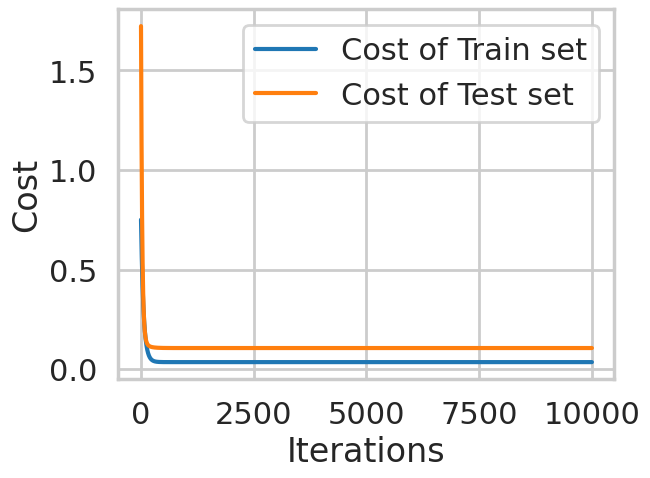

In [79]:
plt.plot(cost_train, label = "Cost of Train set")
plt.plot(cost_test, label = "Cost of Test set")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

Based on the graph, the cost of the test and train sets decreases as the number of iterations increases.

# QUESTIONS:

In [80]:
# assume that the initial weights are all 0s
init_w = np.array([0.0, 0.0, 0.0, 0.0])

#### 1. What are the optimal weights found by your implemented gradient descent? Plug it into the linear model

In [90]:
# call the grad_descent function
weights_matrix, costs = grad_descent(x_train, y_train, init_w, 0.01, 50000)
# get the final weights
optimal_weight = weights_matrix[-1]  # Use the last row for the optimal weights
print("Weights: ", optimal_weight)

Weights:  [ 0.02330854  0.71097729  0.57172469 -0.0116373 ]


In [91]:
# plug the weights into the linear model
print("Linear Model:")
print(f"h_θ(x) = {optimal_weight[0]} + {optimal_weight[1]} * TV + {optimal_weight[2]} * Radio + {optimal_weight[3]} * Newspaper")

Linear Model:
h_θ(x) = 0.0233085408078229 + 0.7109772943595443 * TV + 0.571724693164487 * Radio + -0.011637298608849253 * Newspaper


#### What are your interpretations regarding the formed linear model?

Both TV and Radio advertising have significant positive effects on the predicted value, while Newspaper advertising has a negative effect. This suggests that increasing investment in TV and Radio is likely to yield a greater return compared to investment in Newspaper advertising.

#### 2. Provide a scatter plot of the predicted and actual for both the train and test set. Is there a trend? Provide an r2 score.

Scatter plot and r2 score for the train set

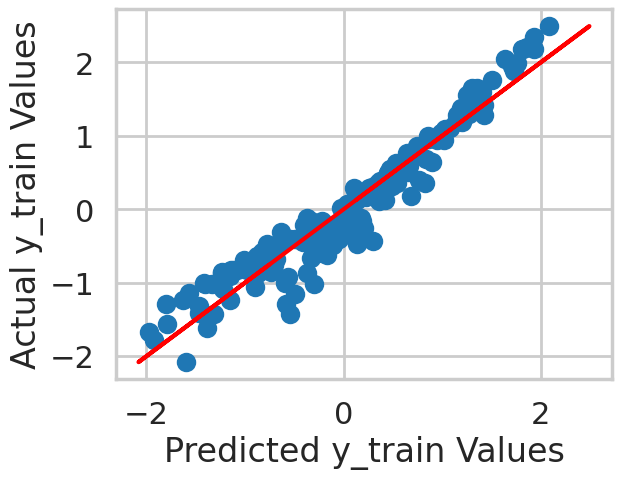

In [83]:
y_hat_train = predict(x_train, optimal_weight)
plt.scatter(y_hat_train, y_train)
plt.xlabel("Predicted y_train Values")
plt.ylabel("Actual y_train Values")
plt.plot(y_train, y_train, color="red")
plt.show()

In [84]:
r2_train = r2_score(y_train, y_hat_train)
print("r2 score: ", r2_train)

r2 score:  0.9244265140847948


Scatter plot and r2 score for the test set

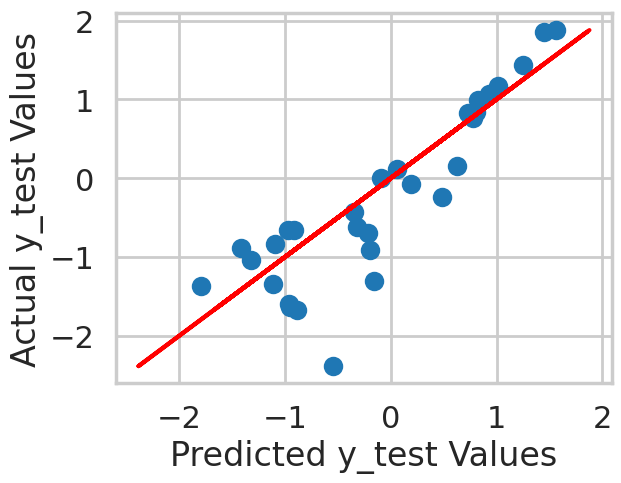

In [85]:
y_hat_test = predict(x_test, optimal_weight)
plt.scatter(y_hat_test, y_test)
plt.xlabel("Predicted y_test Values")
plt.ylabel("Actual y_test Values")
plt.plot(y_test, y_test, color="red")
plt.show()

In [86]:
r2_test= r2_score(y_test, y_hat_test)
print("r2 score: ", r2_test)

r2 score:  0.756646110164877


The two scatter plots display both upward direction or trend. This suggests that as the actual y values increases, the predicted y values also increases. On the other hand, both the sets exhibit relatively high r2 scores which suggests a strong correlation between the predicted and actual y values. Train set indicates a better predictive accuracy than the test set since its r2 score is higher.

#### 3. What happens to the error, r2, and cost as the number of iterations increase? Show your data and proof.

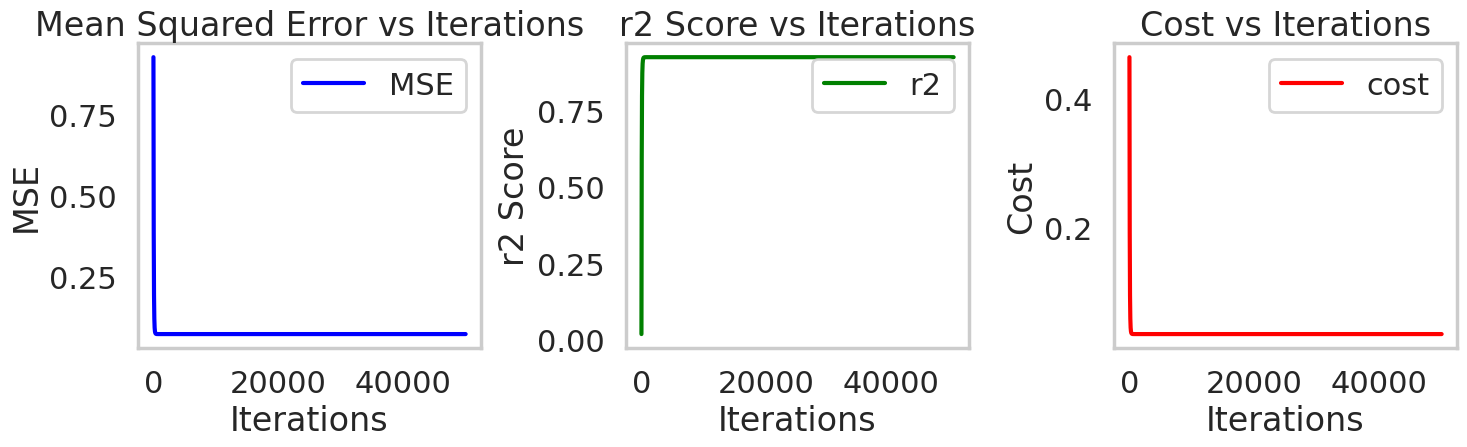

In [87]:
# initialize arrays to store MSE, r2, and costs
array_mse = []
array_r2 = []
array_cost = []

# iterate through the weights to compute metrics
for i in range(len(weights_matrix)):
    # calculate predictions for the ith iteration
    y_hat_train = predict(x_train, weights_matrix[i])
    # calculate MSE
    mse = mean_squared_error(y_train, y_hat_train)
    array_mse.append(mse)
    # calculate r2
    r2 = r2_score(y_train, y_hat_train)
    array_r2.append(r2)
    cost = compute_cost(y_hat_train, y_train, weights_matrix[i])
    array_cost.append(cost)

# plotting the results
plt.figure(figsize=(15, 5))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(array_mse, label="MSE", color="blue")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Mean Squared Error vs Iterations")
plt.grid()
plt.legend()

# r2 Plot
plt.subplot(1, 3, 2)
plt.plot(array_r2, label="r2", color="green")
plt.xlabel("Iterations")
plt.ylabel("r2 Score")
plt.title("r2 Score vs Iterations")
plt.grid()
plt.legend()

# cost Plot
plt.subplot(1, 3, 3)
plt.plot(array_cost, label="cost", color="red")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

For MSE vs Iterations, as the number of iterations increases, the MSE decreases significantly. This suggests that the model learns effectively from the data since the lower the MSE, the more accurate it is since it is closer to the actual values.

For r2 vs Iterations, as the number of iterations increases, the MSE increases significantly, suggesting a proportion of variance. This implies a strong capability in prediction since it is effective at capturing the underlying patterns in the data.

For Cost vs Iterations, as the number of iterations increases, the MSE decreases significantly. This suggests that the model weights adjust appropriately to minimize the prediction errors.

Determine the optimal number of iterations to check the effect on the cost and error for different learning rates on number 4.

In [67]:
# calculate MSE for a given number of iterations
def calculate_mse_for_iterations(x_train, y_train, init_w, learning_rate, iterations):
    weights_matrix, _ = grad_descent(x_train, y_train, init_w, learning_rate, iterations)
    final_weights = weights_matrix[-1]
    y_hat_train = predict(x_train, final_weights)
    mse = mean_squared_error(y_train, y_hat_train)
    return mse

# range of iterations to test
iterations_range = range(1000, 50001, 1000)

# array to store MSE for different iterations
array_mse = []

# iterate through different numbers of iterations
for iterations in iterations_range:
    mse = calculate_mse_for_iterations(x_train, y_train, init_w, 0.01, iterations)
    array_mse.append(mse)

optimal_iterations = iterations_range[np.argmin(array_mse)]
print("Optimal number of iterations: ", optimal_iterations)

Optimal number of iterations:  3000


#### 4. Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate. The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT. Provide your analysis

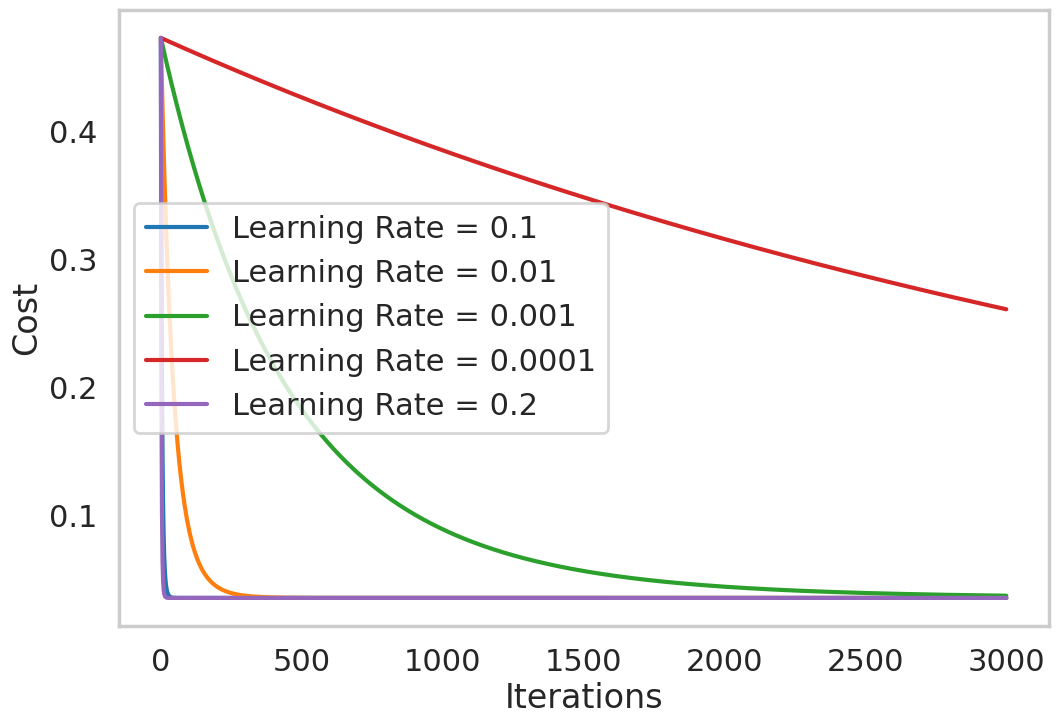

In [62]:
# store costs for each learning rate
costs_by_lr = {}
# different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]

for learning_rate in learning_rates:
    # calculate cost function with optimal iterations
    costs = grad_descent(x_train, y_train, init_w, learning_rate, optimal_iterations)
    costs_by_lr[learning_rate] = costs

plt.figure(figsize=(12, 8))
for learning_rate, costs in costs_by_lr.items():
    plt.plot(range(len(costs[1])), costs[1], label=f"Learning Rate = {learning_rate}")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()

We observe that as the learning rate increases, the lines become steeper, indicating that higher learning rates require fewer iterations to minimize the cost function, leading to faster learning. In contrast, lower learning rates need more iterations or longer training times to achieve the same minimization.

#### 5. Is there a relationship on the learning rate and the number of iterations?

Yes, as mentioned in number 4, higher learning rate only needs fewer number of iterations to minimize the cost function and reach the optimal solution while lower learning rate needs more iterations to achieve the same minimization. Even though the lower learning rate takes a longer time to reach the optimal solution, it is more precise since it only makes smaller adjustments carefully with each iteration.

To conclude, there is an inverse relationship between the learning rate and the number of iterations.

#### 6. Compare the results with the results of ordinary least squares function.

In [66]:
# Ordinary Least Squares (OLS) Regression
ols = LinearRegression()
ols.fit(x_train, y_train).coef_

# Predict on the train set
ols_r2 = r2_score(y_train, ols.predict(x_train))
grad_desc_r2 = array_r2[-1]

print("OLS Regression Results:", ols_r2)
print("Gradient Descent Results:", grad_desc_r2)

OLS Regression Results: 0.9244265140847948
Gradient Descent Results: 0.9244265140847948


OLS Regression and our implemented gradient descent algorithm displayed the same results, indicating that both methods successfully converged to the same optimal solution, validating the accuracy of the gradient descent algorithm we implemented in finding the best-fit parameters.